In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_blobs

In [3]:
print("Downloading mnist...")
mnist = fetch_openml('mnist_784', version=1, cache=True)

c:\Users\aloks\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


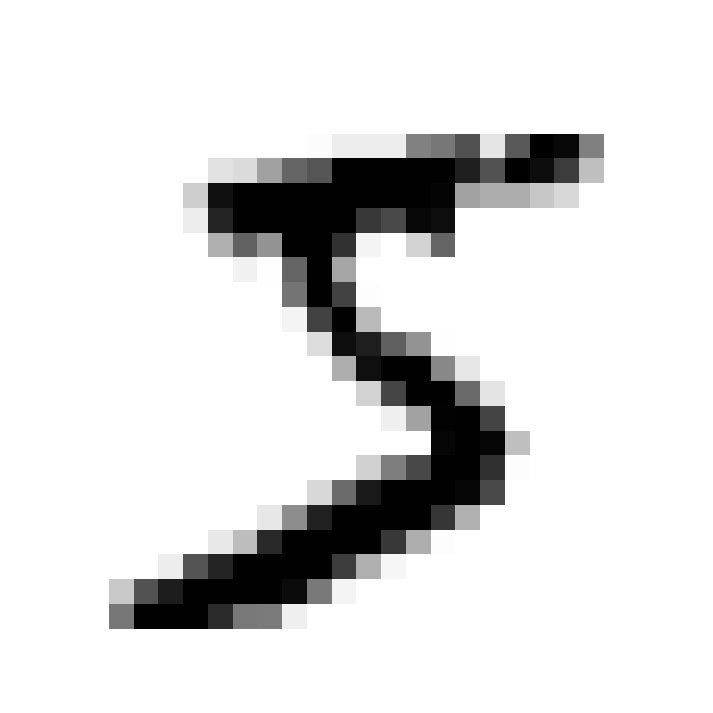

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
mnist.frame.info()

X = mnist['data'].astype('float32')
y = mnist["target"].astype('int64')

# Normalize image data from 0-255 to 0-1
X = X / 255

n_train = 60000
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = X_train[:1]
# plot_digits(example_images, images_per_row=10)

plot_digits(example_images, images_per_row=10)
plt.show()


In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def k_means_clustering(X, centers, max_iterations):
    clusters = []

    for idx in range(len(centers)):
        cluster = {
            'center' : centers[idx],
            'points' : []
        }

        clusters.append(cluster)

    for i in range(max_iterations):
        clusters = partition_points(X, clusters)
        new_clusters = update_centers(X, clusters)

        cents = []

        for cluster in clusters:
            cents.append(cluster['center'])
        cents = np.array(centers)

        new_cents = []
        for cluster in new_clusters:
            new_cents.append(cluster['center'])
        new_cents = np.array(new_cents)

        diff = centers - new_cents

        if not diff.any():
            return (clusters, i)
        
        clusters = new_clusters

    return (clusters, max_iterations)

def partition_points(X, clusters):
    # Reset the points assigned to each center
    for idx in range(len(clusters)):
        clusters[idx]['points'] = []

    # Choose the center for each point
    for i in range(len(X)):

        # Get smallest distance to centers
        distances = []
        for j in range(len(clusters)):
            dist = distance(X[i], clusters[j]['center'])
            distances.append(dist)

        min_cluster = np.argmin(distances)

        # Assign point to center
        clusters[min_cluster]['points'].append(X[i])

    return clusters

def update_centers(X, clusters):
    for i in range(len(clusters)):
        points = np.array(clusters[i]['points'])
        
        # Generate a new center from the mean of the points
        if (len(points) > 0):
            clusters[i]['center'] = points.mean(axis=0)

    return clusters

In [25]:
num_of_images = 1000

example_images = X_train[:num_of_images]
example_labels = y_train[:num_of_images]
centers = []

for i in range(10):
    filtered_images = example_images[example_labels == i]
    centers.append(filtered_images.iloc[0])

# for i in range(10):
#     centers.append(np.random.randint(256, size=784))

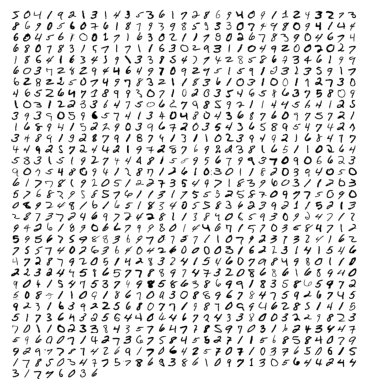

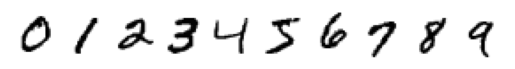

In [26]:
plot_digits(example_images, (int)(pow(num_of_images, 0.5)))
plt.show()

plot_digits(centers)
plt.show()

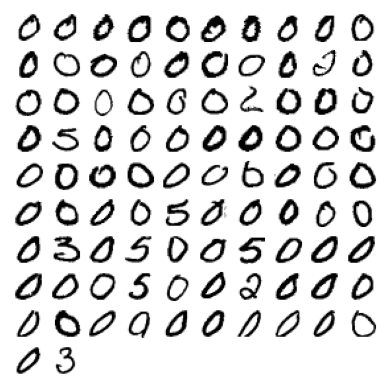

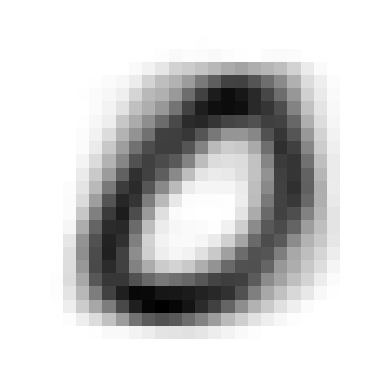

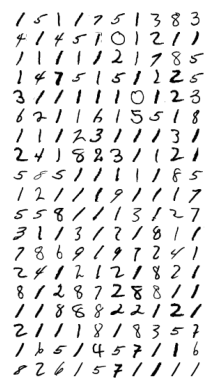

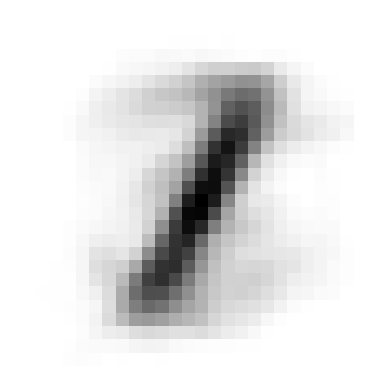

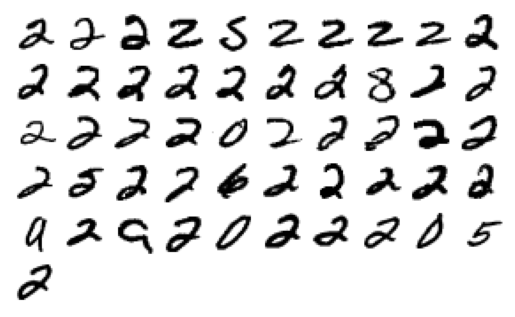

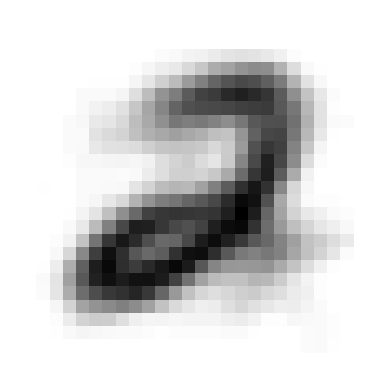

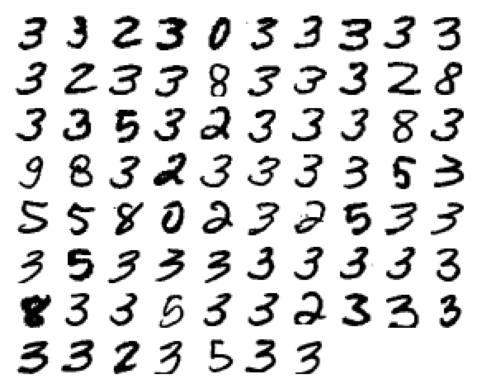

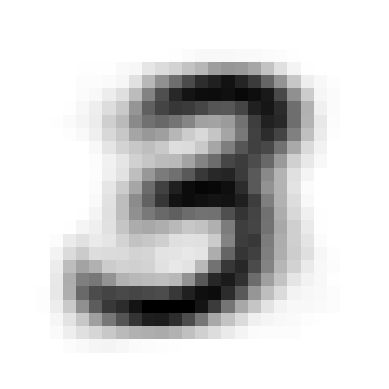

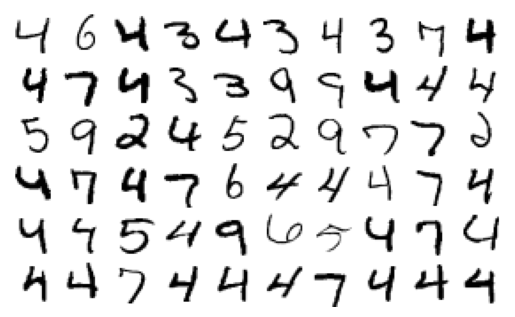

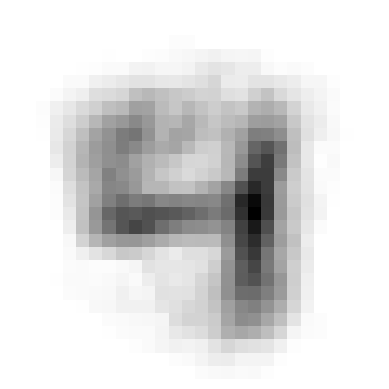

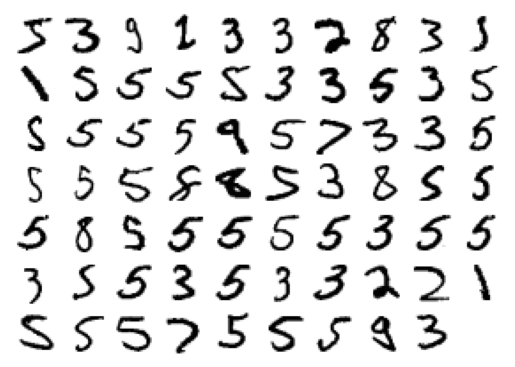

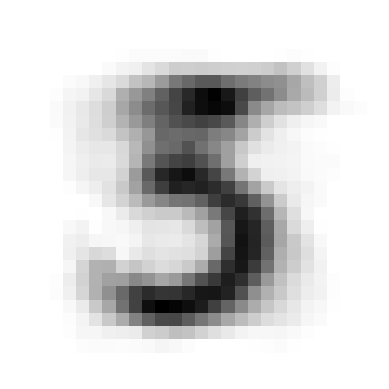

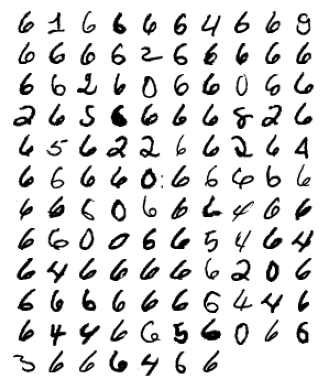

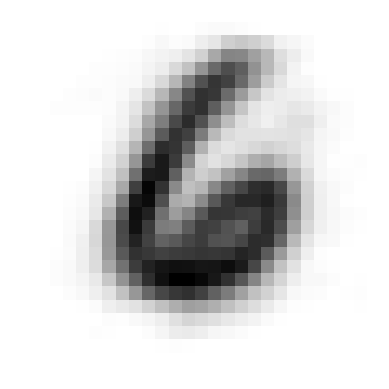

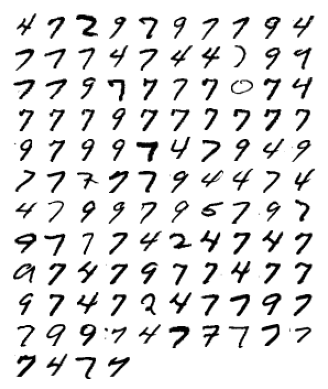

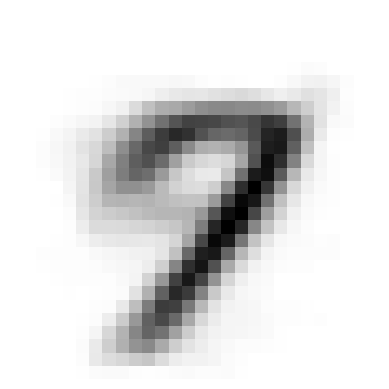

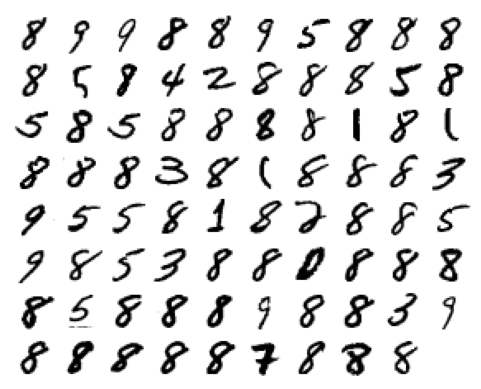

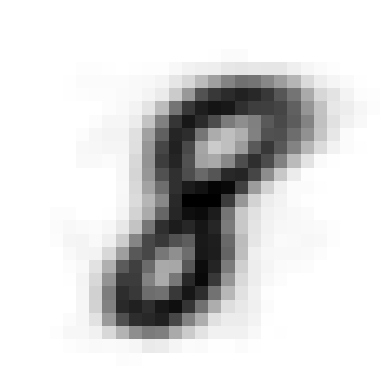

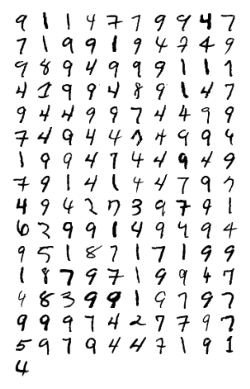

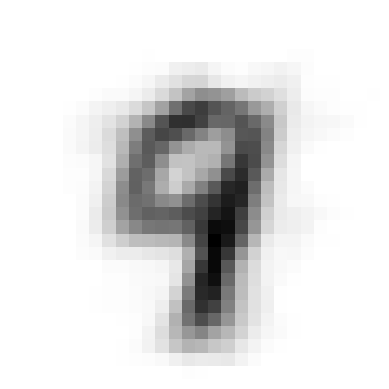

In [29]:
clusters, iters = k_means_clustering(example_images.to_numpy(), centers, 1)



# print(iters)

for i in range(len(clusters)):
    if (len(clusters[i]['points']) != 0): 
        plot_digits(clusters[i]['points'])
        plt.show()

    plot_digits([clusters[i]['center']])
    plt.show()

correct_predicts = 0

# for i in range(num_of_images):
